<a href="https://colab.research.google.com/github/SergeyS1954/LW_TR/blob/main/LW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа № 3
## Резервирование как метод повышения надежности

## Основные определения

*Резервирование* - метод обеспечения надежности системы за счет использования дополнительных элементов, избыточных по отношению к минимально необходимому множеству для выполнения требуемых функций с целью сохранения работоспособного состояния объекта при отказе одного или нескольких элементов.

*Основной элемент* --- элемент, необходимый для выполнения требуемых функций без использования резерва.

*Резервный элемент* --- элемент, предназначенный для выполнения функций основного элемента в случае его отказа.

*Структурное резервирование* обеспечивается за счет введения в структуру системы (объекта) дополнительных элементов, которые выполняют функции основных элементов в случае их отказа.




## Классификация методов структурного резервирования

**Классификационные признаки** структурного резервирования:

1. Организация восстановления отказавших элементов;
2. Организация нагрузки на резервные элементы.

По *организации восстановления* отказавших элементов выделяют:

--- *резервирование с восстановлением* ---  работоспособность отказавших элементов восстанавливается без прекращения функционирования включающей элемент системы;

--- *резервирование без восстановления* ---  работоспособность отказавших элементов не восстанавливается.

По *организации нагрузки на резервные элементы* выделяют:

--- *горячее резервирование* --- основной и резервный элементы работают в одинаковом режиме;
--- *холодное резервирование* --- резервные элементы не несут нагрузки до момента подключения их вместо отказавшего.


## Кратность резервирования

*Кратность резервирования* --- это отношение числа резервирующих элементов к числу резервируемых элементов (основных), выраженное несокращаемой дробью.

Кратность резервирования $m$ определяется соотношением:

$$
	m = \frac{r}{bas},
$$
где $r$ --- число резервных элементов; $bas$ --- число основных элементов.

Например, если кратность резервирования обозначена $m = 3/2$, то это означает наличие резервирования с дробной кратностью, при котором число резервных элементов равно $r = 3$, число основных элементов равно $bas = 2$, а общее число элементов равно $5$.

Резервирование элементов системы с кратностью $m = 1$ обычно называют  *дублированием*.



## Горячее резервирование с целой кратностью

Горячее резервирование с целой кратностью предполагает, что  основной и каждый резервирующий объект имеют одинаковое количество элементов, соединенных параллельно в структурной схеме надежности. Резервирующие объекты включены параллельно основному объекту и самим себе.

Обозначим через $\lambda_0 $ --- интенсивность отказов основного  или любого из резервных объектов.

Тогда  вероятность безотказной работы системы $P_s(t)$ определяется соотношением:

$$
	P_s(t) = 1 - (1 - e^{-\lambda_0 t})^{m+1}.
$$

Средняя наработка до отказа объекта с горячим резервированием с целой кратностью определяется по формуле:

$$
	\bar T = \frac{1}{\lambda_0}\sum_{i = 1}^{m}\frac{1}{i + 1}.
$$


Рассмотрим задачу определения кратности резервирования $m$, необходимой для достижения заданной надежности системы, для которой используется схема горячего резервирования с целой кратностью.

решение может быть получено по формуле:
$$
m = \frac {\log (1 - P_{з})}{\log (1 - P_0)} - 1,   
$$
где $ P_{z}$ --- заданная надежность резервированной системы, а $P_0$ --- надежность элемента без резервирования.

Ниже приведена зависимость $m$ от значения  $P_0$ --- надежности элемента без резервирования при заданных значениях  $ P_{z}$.


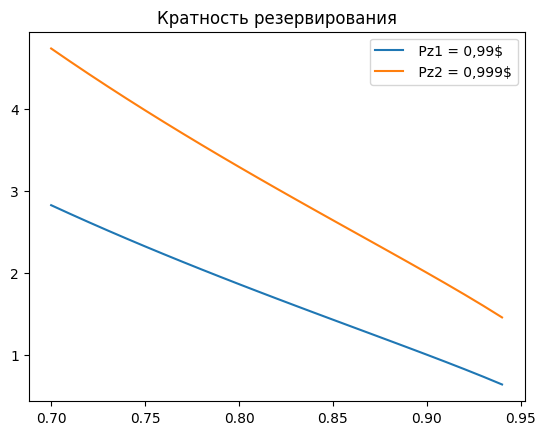

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
Pz1 = 0.99
Pz2 = 0.999
p0 = np.arange (0.7, 0.95, 0.01)
y1 = (np.log(1-Pz1))/(np.log(1-p0)) -1
y2 = (np.log(1-Pz2))/(np.log(1-p0)) -1
plt.plot(p0,y1, label = " Pz1 = 0,99$")
plt.plot(p0,y2, label = " Pz2 = 0,999$")
plt.legend()
plt.title('Кратность резервирования')
plt.show()

На графике значение $m$ действительное, а не целое. Какие практические рекомендации о выборе $m$ можно дать, исходя из приведенных данных?

## Холодное резервирование с целой кратностью

Для метода холодного резервирования предполагается, что при отказе основного объекта он отключается, а вместо него подключается один из резервных объектов. Таким образом, резервированная система откажет в случае отказа основного и всех резервных объектов.

В рамках данной модели предполагается, что переключающие элементы системы устройства безотказны, т.е. абсолютно надежны. Это допущение модели, возможность использования которого должна быть обоснована при анализе реальной системы.

Обозначим, как и ранее,  через $\lambda_0 $ --- интенсивность отказов основного  или любого из резервных элементов.

Средняя наработка до отказа системы с холодным резервированием объекта определеяетя по формуле:

$$
\bar T_m = \frac{m + 1}{\lambda_0} = (m + 1) T_0,  
$$
где через $ T_0$ обозначено время наработки на отказ для системы без резерва.



## Модели дублирования элемента с восстановлением

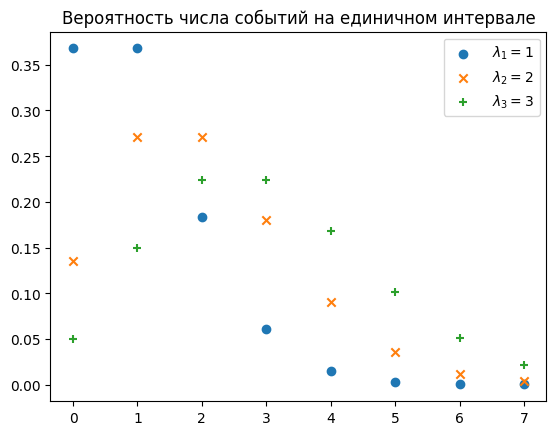

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
lam = 1.0
x = np.arange (0, 8, 1)
y1 = stats.poisson.pmf(x, lam)
y2 = stats.poisson.pmf(x, 2.0*lam)
y3 = stats.poisson.pmf(x, 3.0*lam)
plt.scatter(x,y1, label = r" $\lambda_1 = 1$")
plt.scatter(x,y2, marker='x', label = r" $\lambda_2 = 2$")
plt.scatter(x,y3, marker='+', label = r" $\lambda_3 = 3$")
plt.legend()
plt.title('Вероятность числа событий на единичном интервале')
plt.show()

## Структурная надежность системы

Одним из методов расчета надежности сложных систем является *метод структурных схем*.

Центральная идея метода --- разработка такой модели системы, в которой она представлена как совокупность фрагментов, объединенных в подсистемы с параллельным и последовательным соединением  элементов.

В результате декомпозиции исходной системы должна быть получена структурная схема, по сути являющаяся моделью,  предназначенной для расчета характеристик надежности  системы.
### Система последовательно соединенных элементов
Назовем систему *системой последовательно соединенных элементов*  $c_1, c_2,\dots c_n$ если она работоспособна тогда и только тогда, когда работоспособен *каждый* элемент системы.

Систему последовательно соединенных элементов также можно определить через понятие отказа:  система  называется системой последовательно соединенных элементов, если отказ любого элемента приводит к отказу всей системы.

Вероятность работоспособности системы   задается формулой:

$$  
\mathbb{P}= \mathbb{P}(\varphi(\textbf{X} = 1))  = \prod_{i=1}^{n}\mathbb{P}(x_i = 1) = \prod_{i=1}^{n}p_i.
$$

### Система параллельно  соединенных элементов

Назовем систему *системой  параллельно соединенных элементов*, если она работоспособна тогда и только тогда, когда работоспособен *по крайней мере один* из элементов системы.

Вероятность работоспособности системы  с параллельным подключением элементов  задается формулой:

$$  
\mathbb{P}= \mathbb{P}(\exists X\varphi(\textbf{X} = 1))  = 1 - \prod_{i=1}^{n}\mathbb{P}(x_i = 0) = 1 - \prod_{i=1}^{n}(1 -p_i).
$$
Если все элементы имеют экспоненциальное распределение времени наработки до отказа, то вероятность работоспособности системы  есть:

$$  
\mathbb{P}(t) = 1 - \prod_{i=1}^{n}(1 - e^{-\lambda_i t}).
$$

Интегрируя на положительной полуоси, получаем среднюю наработку системы до отказа

$$  
\mathbb{T} = \sum_{i=1}^{n} \frac{1}{\lambda_i} - \sum_{i<j} \frac{1}{\lambda_i + \lambda_j} + \dots + (-1)^n \frac{1}{\lambda_1 + \dots + \lambda_n}.
$$

Если интенсивности отказов элементов системы равны ${\lambda}$, то получаем более простой вид зависимости
$$  
\mathbb{T} = \left( 1 + \frac{1}{2} + \dots + \frac{1}{n} \right)\frac{1}{\lambda} .
$$

Представленная формула показывает, что эффект от увеличения  параллельно работающих элементов не пропорционален их числу.


Приведем пример, иллюстрирующий изменение надежности системы параллельно соединенных элементов, от их числа.

В качестве иллюстрации, на  рассмотрим график увеличения среднего времени наработки на отказ для системы, состоящей из набора параллельно соединенных элементов.

В данном примере  среднее время наработки на отказ  элемента системы положено равным  $1/\lambda = 100$.

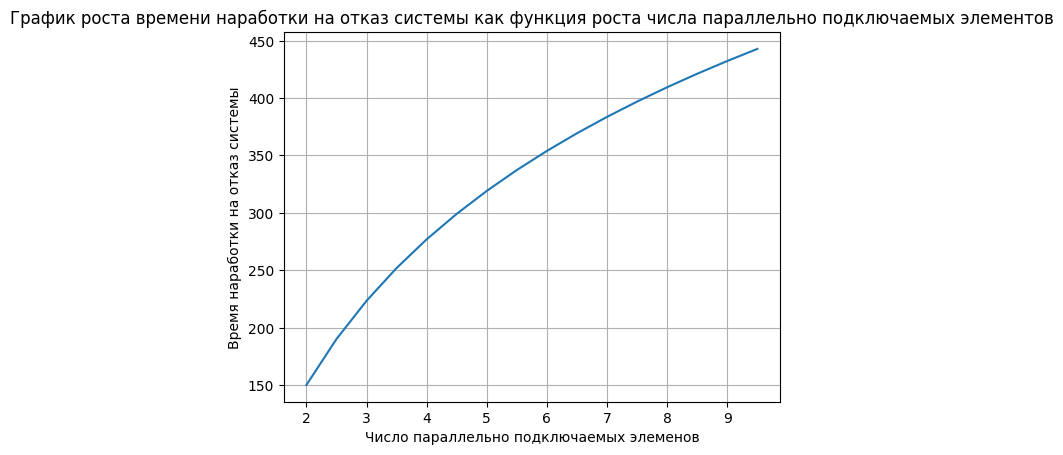

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

T = 100
TT = []
k = 1
n = np.arange (2., 10.,0.5)
for nn in n:
    k = k + 1/nn
    TT.append(T*k)

plt.plot (n,TT)
plt.title('График роста времени наработки на отказ системы как функция роста числа параллельно подключаемых элементов')
plt.xlabel('Число параллельно подключаемых элеменов')
plt.ylabel('Время наработки на отказ системы')
plt.grid(True)
plt.show()


График наглядно демонстрирует, что система из четырех параллельно соединенных элементов приводит менее, чем трехкратному увеличению среднего времени наработки на отказ.

И только восемь(!) параллельно подключенных элементов приводят к четырехкратному увеличению среднего времени наработки на отказ системы.

## Неприводимые системы
Система называется *неприводимой* если ее структура не может быть представлена в виде комбинаций последовательных и параллельных соединений.

Простейшей неприводимой системой является мостиковая схема.

Пример расчета простейшей мостиковой схемы методом разложения по полной группе событий.

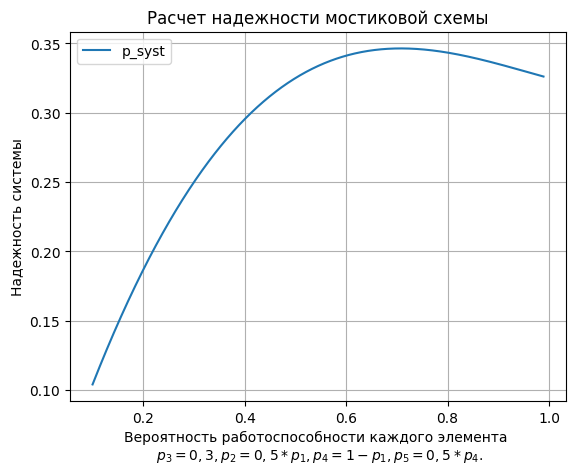

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

p = np.arange (0.1, 0.99, 0.001)
p_3 = 0.3

p_1 = p
p_2 = 0.5 *p
p_4 = 1- p
p_5 = 0.5*p
# Элемент 3 гарантированно исправен
pa1  = (1 -p_1)*(1- p_2)
pa2  = (1-p_4)*(1-p_5)
pa = (1 - pa1)*(1 - pa2)
# Элемент 3 неисправен
pb1  = 1 -p_1*p_4
pb2  = 1 - p_2*p_5
pb = 1 - pb1*pb2
# Надежность системы как разложение по полной группе событий
p_syst = p_3*pa + (1-p_3)*pb
fig = plt.figure()
plt.plot (p,p_syst, '-', label = 'p_syst')

plt.title('Расчет надежности мостиковой схемы')
plt.xlabel('Вероятность работоспособности каждого элемента \n $p_3 = 0,3, p_2= 0,5*p_1, p_4 = 1 - p_1, p_5= 0,5*p_4$.')
plt.ylabel('Надежность системы')
plt.legend()
plt.grid(True)


plt.show()